<a href="https://colab.research.google.com/github/wanjiku-wairimu1/ML-models/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas
data = pandas.read_csv("https://modcom.co.ke/data/datasets/Advertising.csv")
data.head(2)

,No,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4


In [ ]:
# Y must be continous to do Regression
# No text data - ML does not support data. If category variables exists in the Independent - encode to 0, 1s
# No empties

In [ ]:
# Step 1: Split to X - independent  and Y - dependent
array = data.values
X = array[:, 1:4]    # 4 is not counted here
Y = array[:, 4]
# X and Y are in capital


In [ ]:
# Step 2: Split to training set and testing set
# we have 200 records, 70% is used training the model, 30% used in testing the model(hideout)
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)
# X_train consist of TV, Radio, Newspaper - 70%
# Y_train consist of Sales - 70%

# X_test consist of TV, Radio, Newspaper - 30%
# Y_test consist of Sales - 30%

In [ ]:
# Step 2a: Cross Validation Of Algorithms/Models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

models = []
models.append(('KNN', KNeighborsRegressor()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('LR', LinearRegression()))
models.append(('GB', GradientBoostingRegressor()))
models.append(('RFR', RandomForestRegressor()))
models.append(('SVM', SVR()))

# KFOLD - Cross Validation
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring = 'r2')
    print(name, cv_results.mean())

KNN 0.8790725161630053
DT 0.9110080696431394
LR 0.8757671101319765
GB 0.967036711302681
RFR 0.9638032259961363
SVM 0.7366226480205218


In [ ]:
# Step 3: Load Machine Learning Models/Algorithms
from sklearn.linear_model import LinearRegression
model = GradientBoostingRegressor()
model.fit(X_train, Y_train)
print('Training happens at this point..')

Training happens at this point..


In [ ]:
# Step 4: Test your model
predictions = model.predict(X_test)
print('Model Predictions ', predictions)
print('Actual Values ', Y_test)

Model Predictions  [17.11177509 21.89584916 20.31149838  6.18264522 23.52855497 12.969581
 22.7833106   9.34468943 11.78957922 15.90246377  8.35901421  8.83027211
 12.5139839   2.83746667 10.42048147 12.11370977  4.62571679 16.57238947
 11.31385106 19.16646081 20.32496807 13.23980178 10.6955329  22.6768956
  9.95845348  8.56160215 22.82893407 12.50256299 10.11953957  4.39557021
 11.40986866 11.31385106 22.28843255  8.8430053  15.59768903 20.65114169
 12.38653984 20.19353127 12.44261317  7.27286007 10.79548005 12.64358481
 10.11585805  9.43597287 11.75264503  8.13417578 10.46473459 14.19871042
 10.25025792 12.43543084 14.59689258 12.06376764  6.3681235   4.57121979
  8.85128696 10.88775312 10.22398563 25.32574856  7.03554193 11.81126548]
Actual Values  [16.9 22.4 21.4  7.3 24.7 12.6 22.3  8.4 11.5 14.9  9.5  8.7 11.9  5.3
 10.3 11.7  5.5 16.6 11.3 18.9 19.7 12.5 10.9 22.2  9.3  8.1 21.7 13.4
 10.6  5.7 10.6 11.3 23.7  8.7 16.1 20.7 11.6 20.8 11.9  6.9 11.  12.8
 10.1  9.7 11.6  7.6 10.5

In [ ]:
# Step 5 : Get metrics using r squared
from sklearn.metrics import r2_score
print('Score  ', r2_score(Y_test, predictions))

Score   0.9802754486540848


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


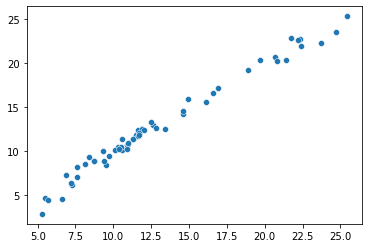

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(Y_test, predictions)

In [ ]:
# Step 6: use the model to predict future 98%C
expense = [[240, 120, 0]]  # 360
outcome = model.predict(expense)
print('You are likely to sell ', outcome, ' Units of Perfume.')
# Y = MX + C

You are likely to sell  [24.14116287]  Units of Perfume.
